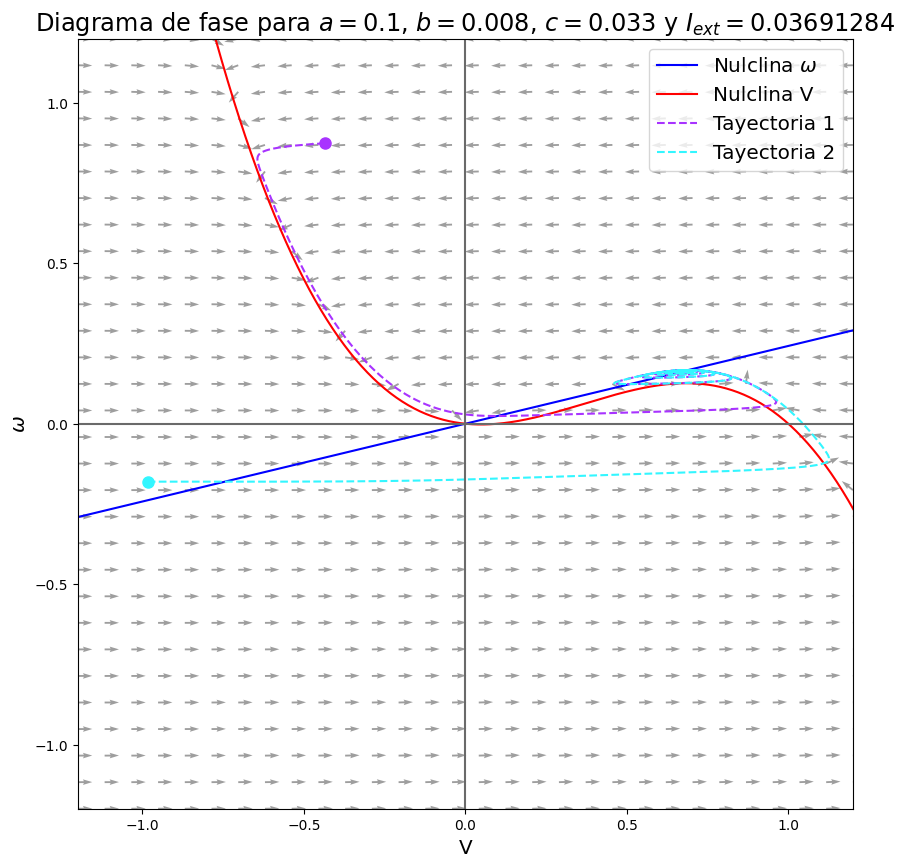

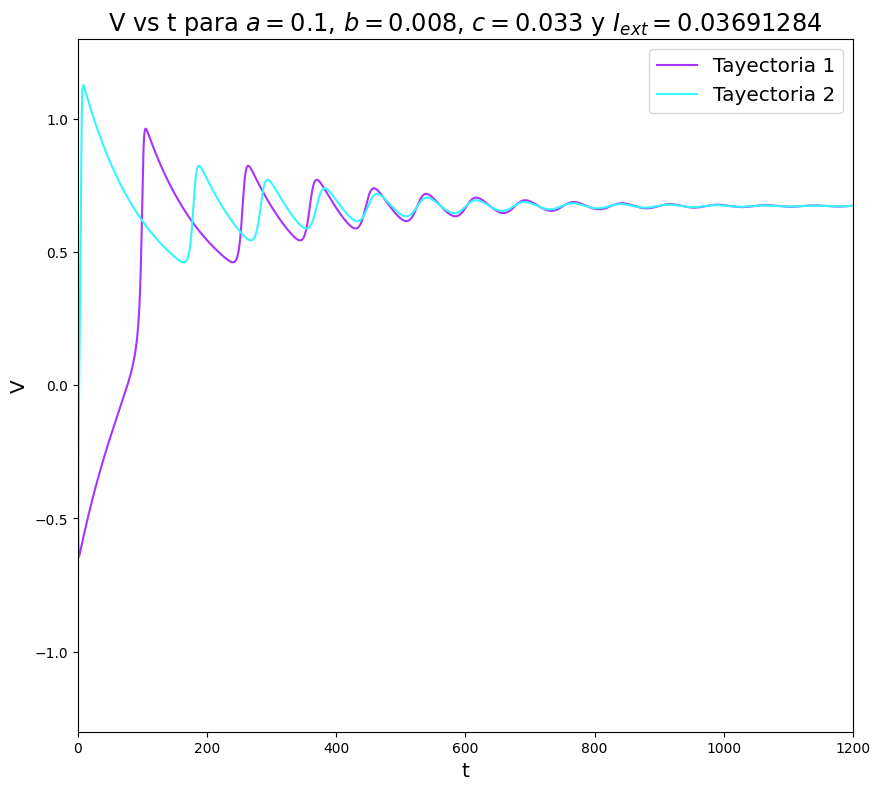

In [13]:
import numpy as np
import matplotlib.pyplot as plt

a=0.1
c=0.033
b=0.008
I=0.03691284


#Resolucion numerica
h=0.001
T=1200

Fv=lambda V,w:V*(a-V)*(V-1.0)-w+I
Fw=lambda V,w:b*V-c*w

aux=0


Muestras=2

rng=np.random.default_rng(6768532)

V=rng.uniform(-1,1,Muestras)
w=rng.uniform(-1,1,Muestras)

V0=0.0
w0=0.0
cm=int(T/h)


V_G=np.zeros((cm,Muestras))
w_G=np.zeros((cm,Muestras))

q=0.0
cont=0
for j in range(Muestras):
    V0=V[j]
    w0=w[j]
    for i in range(cm):
        V_G[i,j]=V0
        w_G[i,j]=w0
    
        aux=V0
    
        V0+=h*(-V0*(1-V0)*(a-V0)-w0+I)
        w0+=h*(b*aux-c*w0)

#Total de lineas que se van a utilizar para representar el fichero



x = np.linspace(-3,3,1000)
y = np.linspace(-3,3,1000)

xlim=1.2
ylim=1.2

X,Y = np.meshgrid(np.linspace(-xlim,xlim,30),np.linspace(-ylim,ylim,30))


FVect=Fv(X,Y)
Fwect=Fw(X,Y)



L=np.sqrt(FVect**2+Fwect**2)


plt.figure(figsize=(10, 10))

colores=["#a833ff","#33f6ff","#ff33f3","#09893d","#9eae00","#8a7f2c","#8a2c2c","#502eac","#db2700","#e0a600","#000000","#f96fde","#b50092","#2eaca4","#aca82e","#2e5aac"]

plt.title(r"Diagrama de fase para $a="+str(a)+"$, $b="+str(b)+"$, $c="+str(c)+"$ y $I_{ext}="+str(I)+"$",fontsize="xx-large")
plt.xlim(-xlim,xlim)
plt.ylim(-ylim,ylim)
plt.xlabel("V",fontsize="x-large")
plt.ylabel(r"$\omega$",fontsize="x-large")
plt.plot(x,b*x/c,color="blue",label=r"Nulclina $\omega$")
plt.plot(x,x*(a-x)*(x-1.0),color="red",label=r"Nulclina V")

for i in range(Muestras):
    plt.plot(V_G[:,i],w_G[:,i],color=colores[i],label="Tayectoria "+str(i+1),linestyle="--")
    plt.plot(V_G[0,i],w_G[0,i],color=colores[i],markersize=8.0,marker="o")
    #plt.plot(V_G[-1,i],w_G[-1,i],color=colores[i],markersize=8.0,marker="D")

plt.quiver(X,Y,FVect/L,Fwect/L, color='#9e9e9e')
#plt.plot(R_G,L_G,color="red",label="Trayectoria",linewidth=4.0)

plt.legend(loc="upper right",fontsize="x-large")

plt.axvline(0.0,color="#6a6a6a")
plt.axhline(0.0,color="#6a6a6a")

plt.savefig("figura_ejercio_2_I_"+str(int(100000000*I))+".png",format="png")

plt.figure(2,figsize=(10,9))
plt.subplot(111)

plt.xlim(0.0,T)
plt.ylim(-1.3,1.3)
plt.xlabel("t",fontsize="x-large")
plt.ylabel(r"V",fontsize="x-large")
plt.title(r"V vs t para $a="+str(a)+"$, $b="+str(b)+"$, $c="+str(c)+"$ y $I_{ext}="+str(I)+"$",fontsize="xx-large")
for i in range(Muestras):
    plt.plot(np.linspace(0,T,V_G.shape[0]),V_G[:,i],color=colores[i],label="Tayectoria "+str(i+1))
plt.legend(loc="upper right",fontsize="x-large")

plt.savefig("figura_ejercio_2_v_t_I_"+str(int(I*100000000))+".png",format="png")